#Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/AQI_WQI_dataset/station_hour.csv')
stations_csv = pd.read_csv('/content/drive/MyDrive/AQI_WQI_dataset/stations.csv')

<ipython-input-5-d640ae6b80e0>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/AQI_WQI_dataset/station_hour.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [7]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [8]:
filtered_df = stations_csv[stations_csv['City'] == 'Kolkata']
station_id = filtered_df['StationId'].tolist()

In [9]:
df = df.merge(filtered_df, on='StationId')
df = df[df.StationId.isin(station_id)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75717 entries, 0 to 75716
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    75717 non-null  object 
 1   Datetime     75717 non-null  object 
 2   PM2.5        68775 non-null  float64
 3   PM10         69212 non-null  float64
 4   NO           70196 non-null  float64
 5   NO2          70798 non-null  float64
 6   NOx          70995 non-null  float64
 7   NH3          71158 non-null  float64
 8   CO           72378 non-null  float64
 9   SO2          70644 non-null  float64
 10  O3           70886 non-null  float64
 11  Benzene      65664 non-null  float64
 12  Toluene      63393 non-null  float64
 13  Xylene       25498 non-null  float64
 14  AQI          70173 non-null  float64
 15  AQI_Bucket   70173 non-null  object 
 16  StationName  75717 non-null  object 
 17  City         75717 non-null  object 
 18  State        75717 non-null  object 
 19  Stat

In [10]:
df.drop(columns=['StationId','Datetime','AQI_Bucket','StationName','City','State','Status'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75717 entries, 0 to 75716
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    68775 non-null  float64
 1   PM10     69212 non-null  float64
 2   NO       70196 non-null  float64
 3   NO2      70798 non-null  float64
 4   NOx      70995 non-null  float64
 5   NH3      71158 non-null  float64
 6   CO       72378 non-null  float64
 7   SO2      70644 non-null  float64
 8   O3       70886 non-null  float64
 9   Benzene  65664 non-null  float64
 10  Toluene  63393 non-null  float64
 11  Xylene   25498 non-null  float64
 12  AQI      70173 non-null  float64
dtypes: float64(13)
memory usage: 7.5 MB


#Check for missing values

In [11]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100
missing_df = pd.concat([missing_values,missing_percentage],axis=1)
missing_df.columns = ['Missing Values','Missing Percentage']
missing_df_sorted = missing_df.sort_values(by='Missing Percentage',ascending=False)
missing_df_sorted

,Missing Values,Missing Percentage
Xylene,50219,66.324603
Toluene,12324,16.276398
Benzene,10053,13.277071
PM2.5,6942,9.168351
PM10,6505,8.591201
AQI,5544,7.322002
NO,5521,7.291625
SO2,5073,6.699948
NO2,4919,6.496560
O3,4831,6.380337


In [12]:
df.drop(columns='Xylene',inplace=True)

In [13]:
df_filled_median = df.fillna(df.median())

In [14]:
df_filled_median.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,19.58,33.76,1.35,18.90,20.25,13.37,0.30,1.82,27.64,18.42,34.06,95.0
1,18.66,30.72,0.81,17.76,18.57,14.20,0.33,1.70,32.27,20.58,39.50,95.0
2,18.25,29.31,3.54,21.11,23.91,17.09,0.34,1.80,35.41,20.17,36.86,95.0
3,16.86,28.61,2.41,17.08,19.48,16.93,0.33,2.33,41.77,22.94,40.67,95.0
4,16.22,28.29,2.15,19.91,22.06,13.07,0.35,2.36,39.04,19.47,37.72,95.0


In [15]:
df = df_filled_median.copy()

#correlation

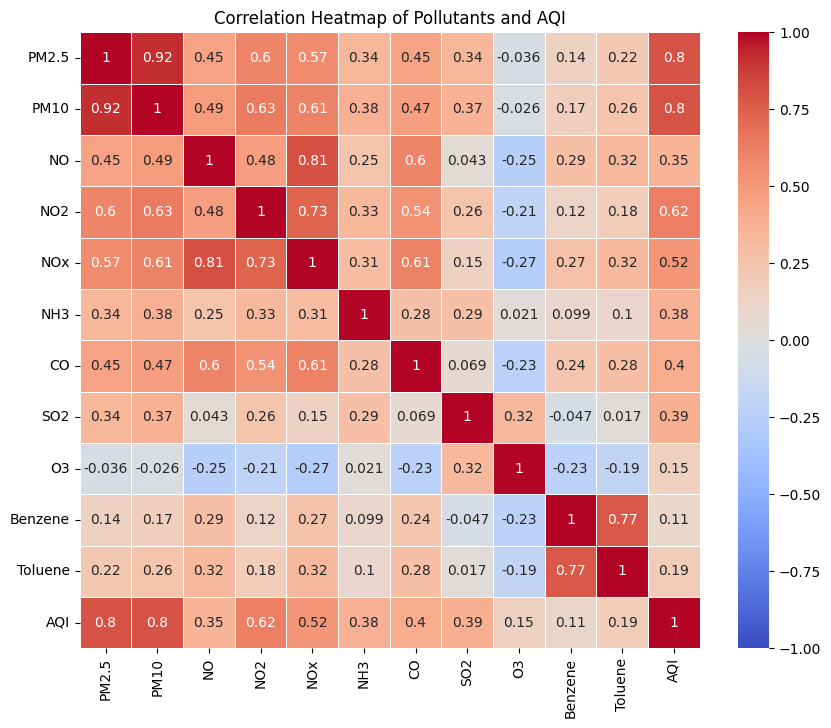

'High positive correlation (near +1): Indicates that the pollutant increases as AQI increases (strong positive relationship).\nHigh negative correlation (near -1): Indicates that the pollutant decreases as AQI increases (inverse relationship).\nNear 0 correlation: Suggests that the pollutant has little to no linear relationship with AQI.'

In [16]:
corr_matrix = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()
'''High positive correlation (near +1): Indicates that the pollutant increases as AQI increases (strong positive relationship).
High negative correlation (near -1): Indicates that the pollutant decreases as AQI increases (inverse relationship).
Near 0 correlation: Suggests that the pollutant has little to no linear relationship with AQI.'''

In [17]:
df.drop(columns=['Toluene','Benzene','O3','NO'],inplace=True)

#Splitting of data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75717 entries, 0 to 75716
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   75717 non-null  float64
 1   PM10    75717 non-null  float64
 2   NO2     75717 non-null  float64
 3   NOx     75717 non-null  float64
 4   NH3     75717 non-null  float64
 5   CO      75717 non-null  float64
 6   SO2     75717 non-null  float64
 7   AQI     75717 non-null  float64
dtypes: float64(8)
memory usage: 4.6 MB


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.iloc[:, :-1] #Independent features
y = df.iloc[:, -1] #Dependent feature

In [21]:
# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Verify the shapes of the split datasets
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')

Training set: (60573, 7), Test set: (15144, 7)


#Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of Determination (R^2) for train dataset:  0.7005791106676662
Coefficient of Determination (R^2) for test dataset:  0.6969010904206867
Mean Squared Error (MSE):  2841.370620633898
Intercept: 31.29443679643343
Slope: [ 0.73447796  0.26783695  0.55070631 -0.07265849  0.34968625 -1.50221596
  0.89255964]


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model = model.fit(X_train, y_train)
prediction = model.predict(X_test)

mse = mean_squared_error(y_test,prediction)
print("Mean Squared Error (MSE): ", mse)
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))

Mean Squared Error (MSE):  1713.5478567105658
Coefficient of Determination (R^2) for train dataset:  0.9615665146634241
Coefficient of Determination (R^2) for test dataset:  0.817209876420461


In [ ]:
new_data = pd.DataFrame({
    'PM2.5': [55, 65, 75],  # Example values (µg/m³)
    'PM10': [110, 120, 130],  # Example values (µg/m³)
    'NO2': [40, 50, 60],  # Example values (ppb)
    'NOx': [30, 35, 40],  # Example values (ppb)
    'NH3': [10, 12, 14],  # Example values (ppb)
    'CO': [0.4, 0.5, 0.6],  # Example values (ppm)
    'SO2': [6, 7, 8],  # Example values (ppb)
})

# Make predictions using the trained model
predictions = model.predict(new_data)

# Display the predicted AQI values
print("Predicted AQI values:", predictions)


Predicted AQI values: [120.305 191.635 201.87 ]


#KFold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def kfold_cross_validation(X, y, model, n_splits=5):
    """
    Perform K-Fold Cross-Validation with the provided model.

    Parameters:
    - X: Features (input data)
    - y: Target variable (output data)
    - model: A scikit-learn model (e.g., LinearRegression, RandomForestRegressor)
    - n_splits: Number of splits for K-Fold Cross-Validation

    Returns:
    - average_mse: The average Mean Squared Error across all folds
    """
    # Initialize KFold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    mse_list = []  # List to store MSE for each fold

    # Perform K-Fold Cross-Validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate MSE and append to the list
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)

    # Calculate the average MSE across all folds
    average_mse = np.mean(mse_list)
    return average_mse


In [ ]:
# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation for Linear Regression
lr_mse = kfold_cross_validation(X, y, linear_model, n_splits=5)
print(f'Average MSE for Linear Regression: {lr_mse}')

# Perform K-Fold Cross-Validation for Random Forest Regressor
rf_mse = kfold_cross_validation(X, y, rf_model, n_splits=5)
print(f'Average MSE for Random Forest Regressor: {rf_mse}')

Average MSE for Linear Regression: 2823.066918605535
Average MSE for Random Forest Regressor: 1729.2128296469396


In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf',C=100,epsilon=0.1)
svr_mse = kfold_cross_validation(X, y, svr_model, n_splits=5)
print(f'Average MSE for SVR: {svr_mse}')

Average MSE for SVR: 2096.3640823612614


#Hyperparameter Tuning

In [ ]:
# Reduced parameter grid for faster tuning
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=5)]  # Fewer values for n_estimators
max_features = [None, 'sqrt']  # Replaced 'auto' with None
max_depth = [int(x) for x in np.linspace(5, 20, num=3)]  # Narrower max_depth range
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

# Parameter grid
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Instantiate Random Forest
forest = RandomForestRegressor()

# RandomizedSearchCV with reduced iterations and fewer folds
search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    cv=3,  # Using 3-fold cross-validation
    n_iter=10,  # Only 10 candidates for faster tuning
    random_state=42,
    n_jobs=-1  # Utilize all cores for parallel processing
)

# Fitting the model
search.fit(X, y)

# Output best hyperparameters
print(f"Best Hyperparameters: {search.best_params_}")
print(f"Best Score (Negative MSE): {search.best_score_}")


Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 12}
Best Score (Negative MSE): -2411.1992585089356


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Model 1: Using n_estimators=200 and random_state=100
forest_manual = RandomForestRegressor(n_estimators=200, random_state=0)
forest_manual.fit(X_train, y_train)
y_pred_manual = forest_manual.predict(X_test)
mse_manual = mean_squared_error(y_test, y_pred_manual)
print(f"MSE with n_estimators=200, random_state=100: {mse_manual}")

# Model 2: Using the best hyperparameters from RandomizedSearchCV
forest_tuned = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=12,
    random_state=42  # Use a consistent random state for comparison
)
forest_tuned.fit(X_train, y_train)
y_pred_tuned = forest_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"MSE with tuned hyperparameters: {mse_tuned}")


MSE with n_estimators=200, random_state=100: 1713.5478567105658
MSE with tuned hyperparameters: 1811.499448239599


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Fine-tune around the best parameters
n_estimators = [180, 200, 220]  # Focus around 200
max_depth = [10, 12, 15]  # Explore smaller depth values around the current best
min_samples_split = [2, 3, 5]  # Try small values for a better fit
min_samples_leaf = [1, 2]  # Explore leaf size around 1

# Parameter grid for fine-tuning
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': ['sqrt']  # Stick with 'sqrt' as it worked well
}

# Random Forest Regressor
forest = RandomForestRegressor(random_state=0)

# RandomizedSearchCV for fine-tuning
search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation for faster tuning
    n_iter=10,  # Limit to 10 iterations for faster results
    random_state=42,
    n_jobs=-1
)

# Fit the model
search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best Hyperparameters: {search.best_params_}")
print(f"Best Score (Negative MSE): {search.best_score_}")

# Evaluate on test data
y_pred_tuned = search.best_estimator_.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"MSE on test data after fine-tuning: {mse_tuned}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Best Score (Negative MSE): -1785.6231277216386
MSE on test data after fine-tuning: 1741.1644375276


#Importing the pickle file

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(search.best_estimator_, 'random_forest_aqi_model.pkl')


['random_forest_aqi_model.pkl']